- scikit-learn
- python-graphviz *
- xgboost

In [13]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import matplotlib.pyplot as plt
import utils.histoHelpers as uhh

plt.style.use('default')
plt.rcParams.update(uhh.ffPltStyleSettings)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

In [3]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [5]:
graph = Source(
    export_graphviz(
        tree_clf, out_file=None,
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True, filled = True
    )
)

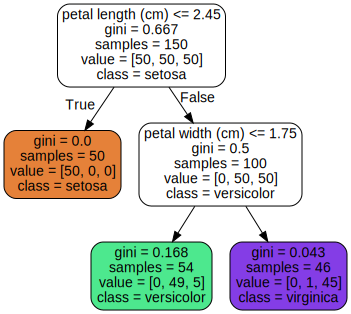

In [6]:
SVG(graph.pipe(format='svg'))

In [10]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [11]:
tree_clf.predict([[5, 1.5]])

array([1])

# Feature importance

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

In [13]:
import numpy as np
import matplotlib as mpl
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42
)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


Text(0.5, 1.0, 'Decision trees with Bagging')

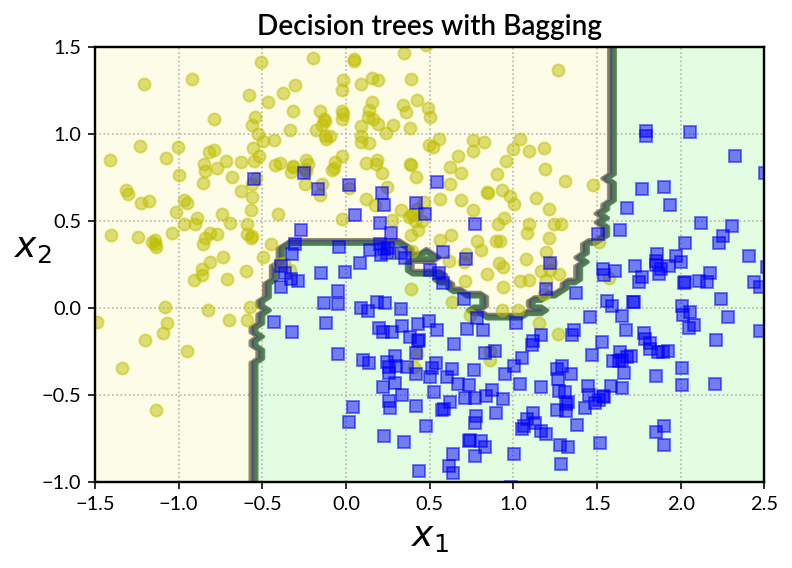

In [8]:
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision trees with Bagging", fontsize=14)

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(iris['data'], iris['target'])
for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11369993712070746
sepal width (cm) 0.02427655674840011
petal length (cm) 0.44247284494223776
petal width (cm) 0.41955066118865425


In [12]:
rnd_clf.feature_importances_

array([0.11369994, 0.02427656, 0.44247284, 0.41955066])

# AdaBoost

In [13]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm='SAMME.R', learning_rate=0.5, random_state=42
)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=42)

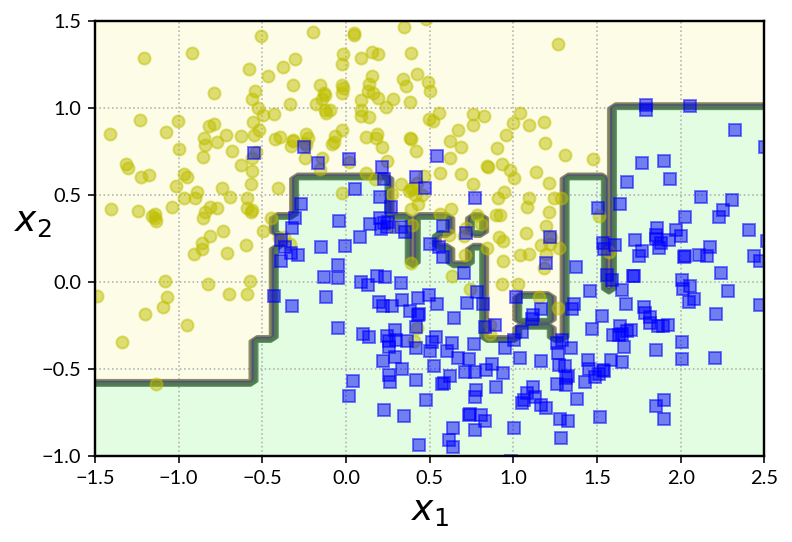

In [14]:
plot_decision_boundary(ada_clf, X, y)

# Gradient Boosting

In [22]:
np.random.seed(42)
X = np.random.rand(100, 1) -0.5
y = 3*X[:, 0]**2 + 0.05*np.random.rand(100)

In [23]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

Text(0.5, 1.0, 'learning_rate=0.1, n_estimators=200')

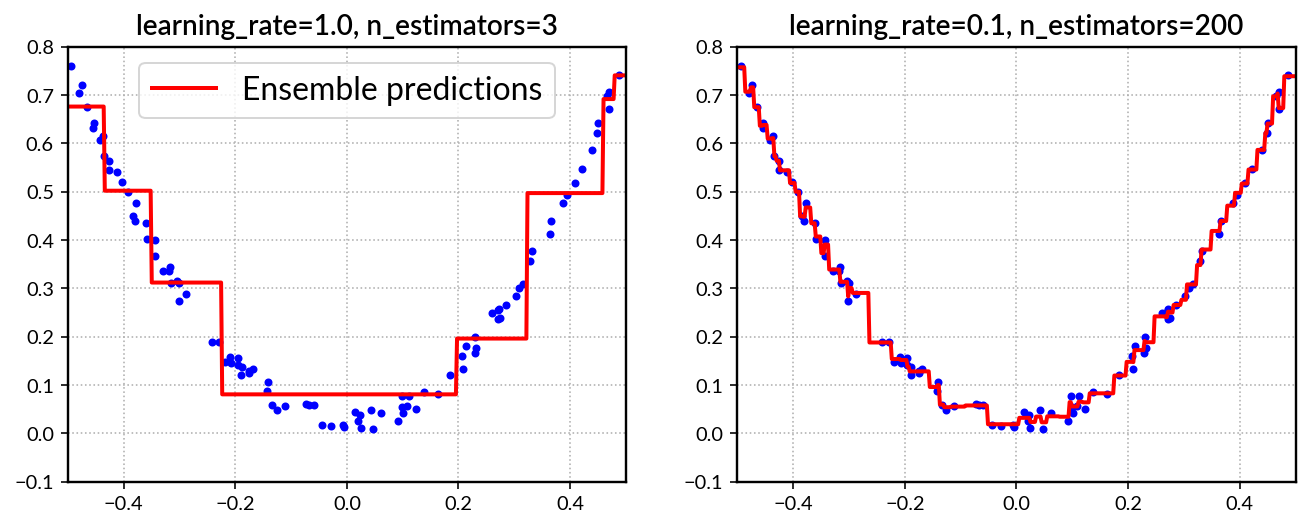

In [27]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label='Ensemble predictions')
plt.title(f'learning_rate={gbrt.learning_rate}, n_estimators={gbrt.n_estimators}', fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title(f'learning_rate={gbrt_slow.learning_rate}, n_estimators={gbrt_slow.n_estimators}', fontsize=14)

## Gradient Boosting with Early stopping

In [28]:
from sklearn.metrics import mean_squared_error
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=75, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [29]:
min_error = np.min(errors)

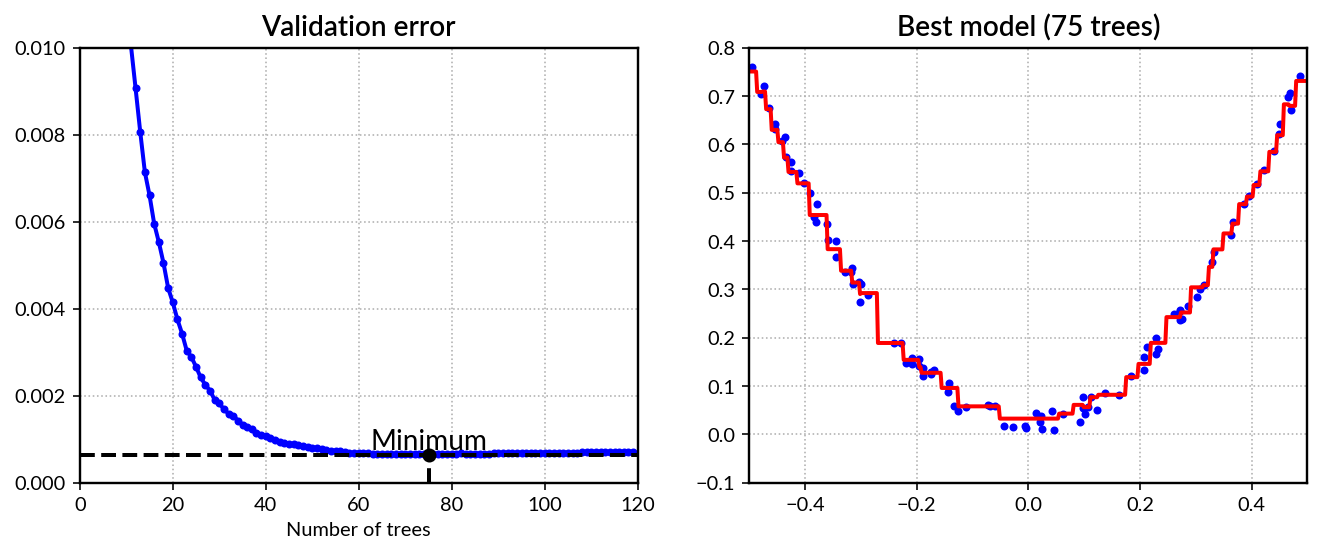

In [30]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14);

In [31]:
bst_n_estimators

75

In [32]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
min_val_error = float('inf')
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error<min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up +=1
        if error_going_up == 5:
            break # early stopping

In [33]:
gbrt.n_estimators

81

In [34]:
print('Minimum validation MSE:', min_val_error)

Minimum validation MSE: 0.0006458608145677205


## Using XGBoost

In [37]:
import xgboost
xgb_reg = xgboost.XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)
val_error = mean_squared_error(y_val, y_pred)
print('Validation MSE:', val_error)

Validation MSE: 0.0006942666334333964


In [38]:
xgb_reg.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=2)
y_pred = xgb_reg.predict(X_val)
val_error = mean_squared_error(y_val, y_pred)
print('Validation MSE:', val_error)

[0]	validation_0-rmse:0.277963
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:0.252439
[2]	validation_0-rmse:0.229309
[3]	validation_0-rmse:0.208732
[4]	validation_0-rmse:0.190724
[5]	validation_0-rmse:0.174202
[6]	validation_0-rmse:0.159308
[7]	validation_0-rmse:0.145911
[8]	validation_0-rmse:0.134107
[9]	validation_0-rmse:0.123064
[10]	validation_0-rmse:0.113215
[11]	validation_0-rmse:0.104319
[12]	validation_0-rmse:0.09615
[13]	validation_0-rmse:0.089205
[14]	validation_0-rmse:0.082501
[15]	validation_0-rmse:0.07656
[16]	validation_0-rmse:0.071111
[17]	validation_0-rmse:0.066179
[18]	validation_0-rmse:0.06172
[19]	validation_0-rmse:0.057955
[20]	validation_0-rmse:0.0543
[21]	validation_0-rmse:0.051138
[22]	validation_0-rmse:0.048218
[23]	validation_0-rmse:0.045734
[24]	validation_0-rmse:0.043211
[25]	validation_0-rmse:0.041204
[26]	validation_0-rmse:0.039217
[27]	validation_0-rmse:0.03734
[28]	validation_0-rmse:0.036027
[29]	validation_0-rmse:0

## Gradient Boosting Classifier

In [14]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
X, y = make_hastie_10_2(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

gb_clf = GradientBoostingClassifier(
    n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0
)
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9243333333333333

In [5]:
gb_clf.feature_importances_

array([0.11027004, 0.09731721, 0.08063927, 0.10789469, 0.11648683,
       0.08750347, 0.10500607, 0.10167503, 0.09681647, 0.09639092])

In [8]:
gb_clf.n_features_

10

In [16]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=5000, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
gb_clf = GradientBoostingClassifier(
    n_estimators=100, learning_rate=0.5,
    max_depth=1, random_state=43
)
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9088

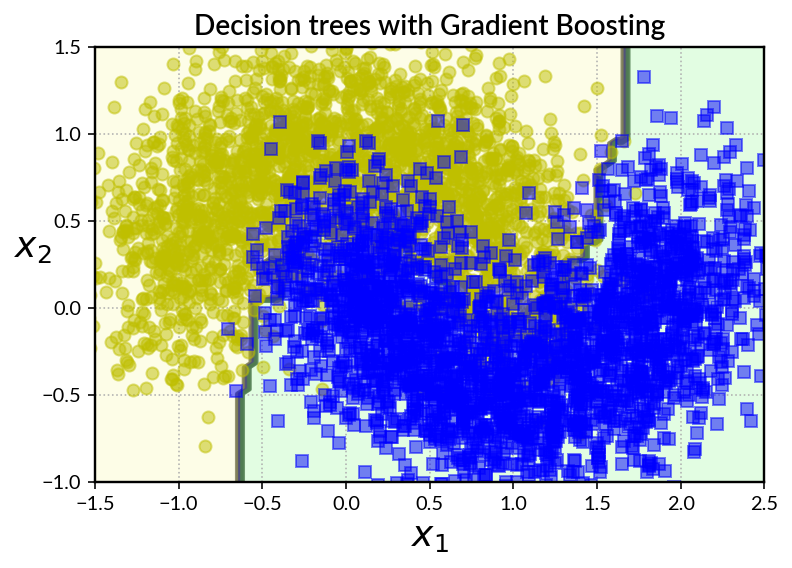

In [14]:
plot_decision_boundary(gb_clf, X, y)
plt.title("Decision trees with Gradient Boosting", fontsize=14);

### ROC curve

In [18]:
from sklearn.metrics import roc_curve, auc

In [19]:
y_score = gb_clf.decision_function(X_test)

In [22]:
y_score

array([-6.11430062, -1.90799268, -5.60167449, ...,  3.40600243,
        1.96305432,  0.11597072])

In [23]:
accuracy_score(y_test, y_pred)

0.9088

In [24]:
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

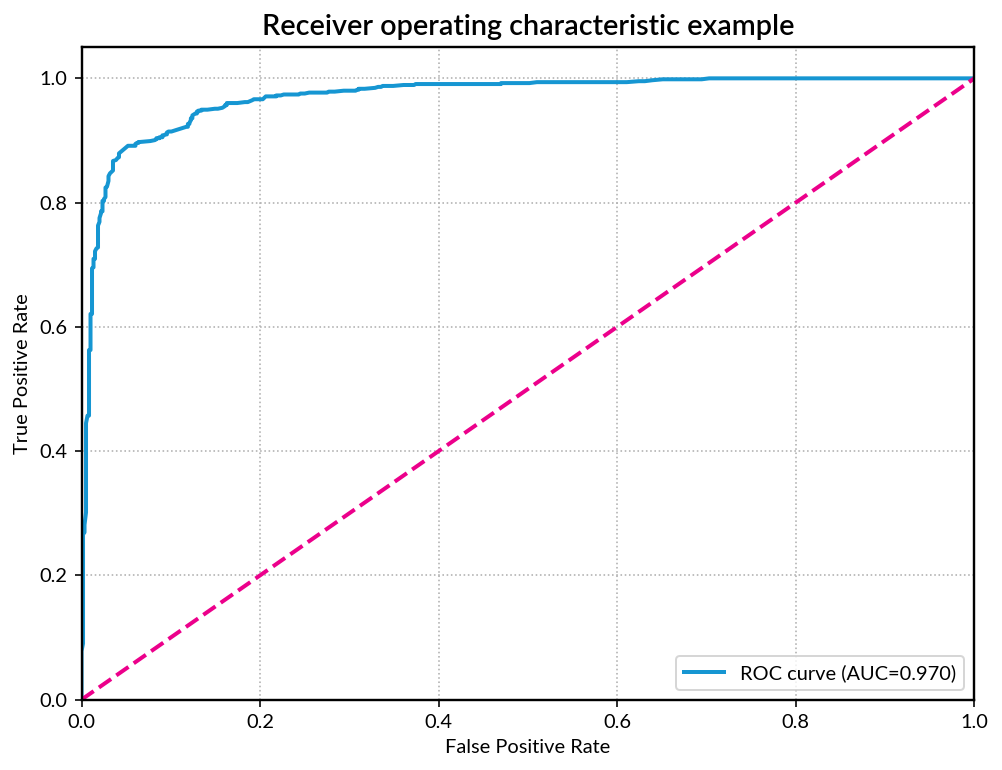

In [25]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, lw=2, label='ROC curve (AUC={:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right");